In [1]:
from time import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os, sys

lib_path = os.path.abspath('..')

if lib_path not in sys.path:
    sys.path.append(lib_path)

In [3]:
from hmc.hamiltonian import HMCSampler

Define:

$$ p(x) \propto \exp \left[- \frac{x^2}{2} + \sin(10 x) \right] $$

In [4]:
def logp(x):
    return np.squeeze(-(x**2)/2 + np.sin(10*x))

def grad_logp(x):
    return (-x + 10*np.cos(10*x)).reshape(-1,1)

In [5]:
init = np.random.uniform(-3, 3, size=(10,1))

n_samples = 2000
sweep = 10
warmup = 100

In [8]:
hmc = HMCSampler(logp=logp, grad_logp=grad_logp, dim=1, dt=0.21, n_leaps=10, verbose=True)

In [9]:
hmc_samples = hmc.sample(init=init, n_samples=n_samples, sweep=sweep, warmup=warmup)

Average acceptance rate: 0.327850


In [12]:
hmc_samples.shape

(10, 2000)

In [10]:
xs = np.linspace(-4, 4, 200)
Z = 3.17356 # Calculated with Mathematica

Text(0.5, 0, 'x')

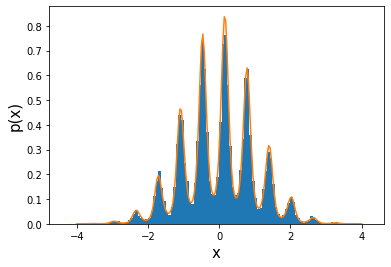

In [11]:
plt.hist(hmc_samples.ravel(), bins=120, density=True)
plt.plot(xs, np.exp(logp(xs))/Z)
plt.ylabel("p(x)", fontsize=15)
plt.xlabel("x", fontsize=15)